<a href="https://colab.research.google.com/github/parthasarathi1234/DL_assignment_1/blob/main/DL_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data();

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images, validation_images,train_labels, validation_labels  = train_test_split(x_train,y_train,test_size = 0.1)

In [4]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(train_images.shape,validation_images.shape,train_labels.shape,validation_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(54000, 28, 28) (6000, 28, 28) (54000,) (6000,)


#Question1

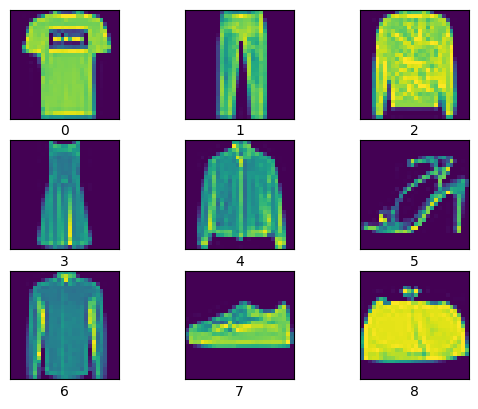

In [5]:
n=0
i=0
while(n!=9):
  if(y_train[i]==n):
    plt.subplot(3,3,n+1)
    n=n+1

    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
  i=i+1

plt.show()

#Question 2


### weights generation

In [6]:
def weight(No_of_layers,neurons,weightInit):
  weights=[]
  bias=[]


  if(weightInit=='random'):
  # input layer
    weights.append(0.01*np.random.randn(neurons,784))
    bias.append(0.01*np.random.randn(neurons,1))

    # Hidden layer
    for i in range(1,No_of_layers):
      weights.append(0.01*np.random.randn(neurons,neurons))
      bias.append(0.01*np.random.randn(neurons,1))

    # output layer
    weights.append(0.01*np.random.randn(10,neurons))
    bias.append(0.01*np.random.randn(10,1))


  else:
    # input layer
    weights.append(0.01*np.random.randn(neurons,784))
    bias.append(np.zeros((neurons,1)))

    # Hidden layer
    for i in range(1,No_of_layers):
      weights.append(0.01*np.random.randn(neurons,neurons))
      bias.append(np.zeros((neurons,1)))

    # output layer
    weights.append(0.01*np.random.randn(10,neurons))
    bias.append(np.zeros((10,1)))

  return weights,bias

  # for i in range(No_of_layers):
  #   neurons.append(int(input()))   # storing no of neurons in each layer

  # weights=[]
  # bias=[]


  # # input layer
  # weights.append(np.random.randn(neurons[0],784))
  # bias.append(np.random.randn(neurons[0],1))

  # # Hidden layer

  # for i in range(1,No_of_layers):
  #   weights.append(np.random.randn(neurons[i],neurons[i-1]))
  #   bias.append(np.random.randn(neurons[i],1))

  # # output layer
  # weights.append(np.random.randn(10,neurons[No_of_layers-1]))
  # bias.append(np.random.randn(10,1))
  # return weights,bias

  # print(len(weights))
  # for i in range(len(weights)):
  #   print(weights[i].shape)

  # for i in range(len(weights)):
  #   print(bias[i].shape)

### activation functions

In [7]:
def sigmoid(a):
  z=np.clip(a,-500, 500)
  return 1 / (1 + np.exp(-z))

def tanh(a):
  z=np.clip(a,-50,50)
  return np.tanh(z)

def softmax(a):
  x=1e-6
  return (np.exp(a-max(a))/(sum(np.exp(a-max(a)))+x))

def tanh_derivative(z):
  return 1-np.tanh(z)**2

def relu(Z):
    A = np.maximum(0, Z)
    return A

def relu_derivative(z):
  return np.where(z>0,1,0)

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

### forward propagation

In [8]:
def  feeb_forward(x,layers,act,wei,b):
  pre_activation=[]
  activation=[]
  z=x.flatten().reshape(784,1)/255.0
  activation.append(z)
  for i in range(layers):
    # print(weights[i].shape,z.shape,b[i].shape)

    a=b[i]+np.dot(wei[i],z)  # pre activation
    # 243/'k'
    pre_activation.append(a)
    if(act=="sigmoid"):
      z=sigmoid(a)
    elif(act=="tanh"):
      z=tanh(a)
    activation.append(z)

  a=b[layers]+np.dot(wei[layers],z)
  pre_activation.append(a)
  z=softmax(a)
  activation.append(z)
  return pre_activation,activation,z



# def feeb_forward(x, layers, act, wei, b):
#     pre_activation = []
#     activation = []
#     z = x.flatten().reshape(784, 1) / 255.0
#     activation.append(z)

#     for i in range(layers):
#         a = b[i] + np.dot(wei[i], z)  # pre activation
#         pre_activation.append(a)

#         if act == "sigmoid":
#             z = sigmoid(a)
#         elif act == "tanh":
#             z = tanh(a)
#         activation.append(z)

#     a = b[layers] + np.dot(wei[layers], z)
#     pre_activation.append(a)
#     z = softmax(a)
#     activation.append(z)

#     return pre_activation, activation, z

###Backward Propagation

In [23]:
def back_propagation(x_t,y_train,z,H,A,layers,W,activation):
  update_x=x_t.reshape(784,1)/255.0
  dw=[]
  db=[]
  y=np.zeros((10,1))
  y[y_train]=1;
  loss=-np.subtract(y,z)
  for k in range(layers,0,-1):
    # print(loss.shape,H[k].shape,z.shape,y.shape)
    loss_dw=loss*H[k].T
    dw.append(loss_dw)

    loss_db=loss
    db.append(loss_db)

    loss_dh=np.dot(W[k].T,loss)

    if(activation=="tanh"):
      x=tanh_derivative(A[k-1])
    elif(activation=="sigmoid"):
      x=sigmoid_derivative(A[k-1])
    else:
      x=relu_derivative(A[k-1])
    loss=np.multiply(loss_dh,x)
  dw.append(loss*update_x.T)
  db.append(loss)
  return dw,db


# def back_propagation(x_t, y_train, z, H, A, layers, W, activation):
#     update_x = x_t.reshape(784, 1) / 255.0
#     dw = []
#     db = []
#     y = np.zeros((10, 1))
#     y[y_train] = 1
#     loss = y - z
#     for k in range(layers, 0, -1):
#         loss_dw = np.matmul(loss, H[k].T)
#         dw.append(loss_dw)

#         loss_db = loss
#         db.append(loss_db)

#         loss_dh = np.matmul(W[k].T, loss)

#         if activation == "tanh":
#             x = tanh_derivative(A[k - 1])
#         elif activation == "sigmoid":
#             x = sigmoid_derivative(A[k - 1])
#         else:
#             x = relu_derivative(A[k - 1])

#         loss = np.multiply(loss_dh, x)

#     dw.append(np.matmul(loss, update_x.T))
#     db.append(loss)

#     return dw, db

# Question 3

### accuracy

In [10]:
def testModel(weights,bias,X,Y,activationFun):
  count = 0
  loss = 0.0

  for i in range(0,x_test.shape[0]):
    A,B,C = forwardProp(X[i],activationFun,"crossEntropy",weights,bias)
    if( y_test[i]==np.argmax(C)):
      count+=1
      loss += -np.log(C)[Y[i]][0]

  loss /= y_test.shape[0]
  acc = (count/y_test.shape[0])
  return acc,loss

In [18]:
def accuracy(theta_w,theta_b,X,Y,activationfun,layers):
  print("accuracy")
  count=0
  loss=0
  # print(X.shape)
  for i in range(0,X.shape[0]):
    act,p_act,z=feeb_forward(X[i],layers,activationfun,theta_w,theta_b)
    print(np.argmax(z),end=",")
    if(np.argmax(z)==Y[i]):
      count+=1

    loss+=-np.log(z)[Y[i]][0]
    loss/=Y.shape[0]
    acc=(count/Y.shape[0])
  return acc,loss

def validation(W,B,x_train,y_train,activationfun,layers):
  accuracy=0
  count=0
  start_index=int(len(x_train)*0.1)

  for i in range(start_index,len(x_train)):
    act,p_act,z=feeb_forward(x_train[i],layers,activationfun,W,B)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
    temp=act[-1]
    count=count-np.log(temp[y_train[i]]+1e-9)
  return (accuracy/(int(len(x_train))))*100,count

In [ ]:
def accuracyCalc(train_image,train_label,W,B,layers,activationfun,lossFun):
  a,h,z = feeb_forward(train_image,layers,activationfun,W,B)
  res = np.copy(h[layers])
  maxi = res[0]
  label = 0
  for i in range(1,10):
    if(res[i] > maxi ):
      maxi = res[i]
      label = i
  if(lossFun == 'entropy'):
    # print(train_label)
    return label , -np.log(res[train_label]+(1e-5))
  else:
    a_l = np.zeros((10,1))
    a_l[train_label] = 1
    return label, np.sum((h[n]-a_l)**2)



def validationAccuracy(validation_image,validation_label,W,B,layers,activationfun,lossFun):
  a,h,z = feeb_forward(validation_image,layers,activationfun,W,B)
  res = np.copy(h[layers])
  maxi = res[0]
  label = 0
  for i in range(1,10):
    if(res[i] > maxi ):
      maxi = res[i]
      label = i
  if(lossFun == 'entropy'):
    return label,-np.log(res[validation_label]+(1e-5))
  else:
    a_l = np.zeros((10,1))
    a_l[validation_label] = 1
    return label, np.sum((h[n]-a_l)**2)

### stochastic gradient descent

In [46]:
def stochastic_gradient_descent(epochs,eta,layers,neurons,activation_fun,weightInit):
  W,B=weight(layers,neurons,weightInit)
  for i in range(epochs):
    dw=[[0 for colu in range(row)] for row in range(len(W))]
    db=[[0 for colu in range(row)] for row in range(len(B))]
    for j in range(54000):
      A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_images[j],train_labels[j],Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()
      for k in range(len(W)):
        W[k]=W[k]-eta*current_dw[k]
        B[k]=B[k]-eta*current_db[k]

    # wandb.long('epoch':i)
    # count=0
    # total_ace=0
    # for j in range()
    acc,loss=accuracy(W,B,train_images,train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,validation_images,validation_labels,activation_fun,layers)
    print(acc,loss,v_acc,v_loss)

    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})
    # wandb.log({})
    # wandb.log({})
    # wandb.log({})

In [ ]:
# def stochastic_gradient_descent(epochs,eta,layers,neurons,activation_fun,weightInit):
#   W,B=weight(layers,neurons,weightInit)
#   for i in range(epochs):
#     dw=[[0 for colu in range(row)] for row in range(len(W))]
#     db=[[0 for colu in range(row)] for row in range(len(B))]
#     for j in range(54000):
#       A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
#       current_dw,current_db=back_propagation(train_images[j],train_labels[j],Z,H,A,layers,W,activation_fun)
#       current_dw.reverse()
#       current_db.reverse()
#       for k in range(len(W)):
#         W[k]=W[k]-eta*current_dw[k]
#         B[k]=B[k]-eta*current_db[k]

#     wandb.log({'epoch':i})
#     count=0
#     total_ace=0
#     for j in range(54000):
#       label,cE=accuracyCalc(train_images[j],train_labels[j],W,B,layers,activation_fun,'entropy')
#       if(label==train_labels[j]):
#         count+=1
#       total_ace+=cE

#     # print("train_accuracy","train_loss",count/540,total_ace/54000)
#     wandb.log({'train_accuracy':count/540})
#     wandb.log({'train_loss':total_ace/54000})

#     # print(count,total_ace)

#     validationAcc = 0
#     total_vcE = 0
#     for j in range(6000):
#       # validation_image = validation_image.reshape(784,1)/255.0
#       label_v,vE = validationAccuracy(validation_images[j],validation_labels[j],W,B,layers,activation_fun,'entropy')
#       if( label_v == validation_labels[j]):
#         validationAcc +=1
#       total_vcE += vE

#     wandb.log({'validation_accuracy':validationAcc/60})
#     wandb.log({'validation_loss':total_vcE/6000})
#     # print(validationAcc,total_vcE)
#     # wandb.log({"Train_Accuracy" : acc})
#     # wandb.log({"Train_Loss" : loss})
#     # wandb.log({"Validation_acc" : v_acc})
#     # wandb.log({"validation_loss" : v_loss})

In [43]:
stochastic_gradient_descent(1,0.01,3,32,"sigmoid","random")

accuracy
(54000, 28, 28)
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2

In [ ]:
    validationAcc = 0
    total_vcE = 0
    for j in range(54000):
      # validation_image = validation_image.reshape(784,1)/255.0
      label_v,vE = validationAccuracy(validation_images[j],validation_labels[j],W,B,layers,activation_fun,'entropy')
      if( label_v == validation_labels[j]):
        validationAcc +=1
      total_vcE += vE

In [ ]:
# stochastic_gradient_descent(1,0.01,3,32,"tanh","random")

In [ ]:
# stochastic_gradient_descent(1,0.01,3,32,"sigmoid","random")

In [ ]:
# stochastic_gradient_descent(1,0.01,4,32,"tanh","random")

In [ ]:
# stochastic_gradient_descent(1,0.01,5,32,"tanh","random")

In [ ]:
# stochastic_gradient_descent(1,0.01,4,64,"tanh","random")

### Momentum gradient descent

In [ ]:
def momentum_gradient_descent(epochs,eta,layers,neurons,activation_fun,batchSize,weightInit):
  beta=0.9
  W,B=weight(layers,neurons,weightInit)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]
  dw=[0 for i in range(layers+1)]
  db=[0 for i in range(layers+1)]
  for i in range(epochs):
    temp=1
    for j in range(54000):
      A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
        dw[k]+=current_dw[k]
        db[k]+=current_db[k]

      if(temp%batchSize==0):
        for k in range(len(W)):
          v_w=beta*pre_v_w[k]+dw[k]
          v_b=beta*pre_v_b[k]+db[k]

          W[k]=W[k]-(eta*v_w)
          B[k]=B[k]-eta*v_b

          pre_v_w[k]=v_w
          pre_v_b[k]=v_b
          for xw in dw:
            xw[:]=0
          for xb in db:
            xb[:]=0
      temp+=1

    aaaa=accuracy(W,B,x_train,y_train,activation_fun,0.1,layers)
    print()
    print(aaaa)

In [ ]:
# momentum_gradient_descent(1,0.1,3,32,"tanh",100)

### Nesterov accelerated gradient descent

In [ ]:
def nesterov_accelerated_gradient_descent(epochs,layers,neurons,eta,activation_fun,batchSize,weightInit):
  beta=0.9
  W,B=weight(layers,neurons,weightInit)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]

  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]
  for i in range(epochs):
    temp=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for k in range(len(W)):
      W[k] = W[k] - beta * pre_v_w[k]
      B[k] = B[k] - beta * pre_v_b[k]
    for k in range(54000):
      A,H,Z=feeb_forward(x_train[k],layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(x_train[k],y_train[k],Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
          dw[k]+=current_dw[k]
          db[k]+=current_db[k]
          pre_v_w[k]=eta*dw[k]+beta*pre_v_w[k]
          pre_v_b[k]=eta*db[k]+beta*pre_v_b[k]
      if(temp%batchSize==0):
        for k in range(len(W)):
          v_w=beta*pre_v_w[k]+eta*dw[k]
          v_b=beta*pre_v_b[k]+eta*db[k]

          W[k]=W[k]-v_w
          B[k]=B[k]-v_b
          pre_v_w[k]=v_w
          pre_v_b[k]=v_b
      temp+=1
    aaaa=accuracy(W,B,x_train,y_train,activation_fun,0.1,layers)
    print()
    print(aaaa)

In [ ]:
# nesterov_accelerated_gradient_descent(1,3,32,0.01,"tanh",100)

### rmsprop

In [ ]:
def rms_prop(epochs,layers,neurons,eta,activation_fun,batchSize,weightInit):
  beta=0.5
  W,B=weight(layers,neurons,weightInit)
  eps=1e-4
  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    temp=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for j in range(54000):
      A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
        dw[k]=dw[k]+current_dw[k]
        db[k]=db[k]+current_db[k]
      if(temp%batchSize==0):
        for k in range(len(W)):
          v_w[k]=beta*v_w[k]+(1-beta)*pow(dw[k],2)
          v_b[k]=beta*v_b[k]+(1-beta)*pow(db[k],2)
          W[k]=W[k]-eta*dw[k]/(np.sqrt(v_w[k])+eps)
          B[k]=B[k]-eta*db[k]/(np.sqrt(v_b[k])+eps)

        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1

    aaaa=accuracy(W,B,x_train,y_train,activation_fun,0.1,layers)
    print()
    print(aaaa)

In [ ]:
# rms_prop(1,3,16,0.1,"tanh",100)

### adam

In [25]:
def adam(epochs,eta,activation_fun,layers,neurons,batchSize,weightInit):
  beta1=0.9
  beta2=0.999
  W,B=weight(layers,neurons,weightInit)
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
    temp=1
    dw=[np.zeros_like(w) for w in W]
    db=[np.zeros_like(w) for w in B]
    for j in range(54000):
      A,H,Z=feeb_forward(train_images[j],layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_images[j],train_labels[j],Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()
      for k in range(len(W)):
        dw[k]=dw[k]+current_dw[k]
        db[k]=db[k]+current_db[k]

      if(temp%batchSize==0):
        for k in range(len(W)):
          m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
          m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
          v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
          v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

          m_w_hat=m_w[k]/(1-pow(beta1,k+1))
          m_b_hat=m_b[k]/(1-pow(beta1,k+1))
          v_w_hat=v_w[k]/(1-pow(beta2,k+1))
          v_b_hat=v_b[k]/(1-pow(beta2,k+1))

          W[k]=W[k]-eta*m_w_hat/(np.sqrt(v_w_hat)+eps)
          B[k]=B[k]-eta*m_b_hat/(np.sqrt(v_b_hat)+eps)
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1
    acc,loss=accuracy(W,B,train_images,train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,validation_images,validation_labels,activation_fun,layers)
    print(acc,loss,v_acc,v_loss)

    # wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})

In [27]:
adam(3,0.1,"tanh",4,64,64,"random")

accuracy
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4

KeyboardInterrupt: 

In [15]:
adam(1,0.1,"tanh",3,32,64,"random")

accuracy
accuracy
0.09981481481481481 5.099624544457889e-05 0.10166666666666667 0.0003737316543103024


### nadam

In [ ]:
def nadam(eta,layers,neurons,epochs,activation_fun,batchSize,weightInit):
  beta1=0.9
  beta2=0.999
  W,B=weight(layers,neurons,weightInit)
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
    temp=1
    dw=[np.zeros_like(w) for w in W]
    db=[np.zeros_like(w) for w in B]
    for j in range(54000):
      A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
        dw[k]+=current_dw[k]
        db[k]+=current_db[k]

      if(temp%batchSize==0):
        for k in range(len(W)):
          m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
          m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
          v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
          v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

          m_w_hat=m_w[k]/(1-pow(beta1,i+1))
          m_b_hat=m_b[k]/(1-pow(beta1,i+1))
          v_w_hat=v_w[k]/(1-pow(beta2,i+1))
          v_b_hat=v_b[k]/(1-pow(beta2,i+1))

          W[k]=W[k]-(eta/(np.sqrt(v_w_hat+eps)))*(beta1*m_w_hat+(1-beta1)*dw[k]/(1-beta1**(k+1)))
          B[k]=B[k]-(eta/(np.sqrt(v_b_hat+eps)))*(beta1*m_b_hat+(1-beta1)*db[k]/(1-beta1**(k+1)))
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1
    aaaa=accuracy(W,B,x_train,y_train,activation_fun,0.1,layers)
    print()
    print(aaaa)


In [ ]:
# nadam(0.1,3,16,1,"tanh",100)

###all

In [ ]:
# epochs=1
# layers=4
# neurons=32
# learningRate=0.1
# beta=0.9
# batchSize=100
# activationFun="tanh"
# batchSize=100
# stochastic_gradient_descent(epochs,learningRate,layers,neurons,activationFun,"random")
# momentum_gradient_descent(epochs,learningRate,layers,neurons,activationFun,batchSize,"random")
# nesterov_accelerated_gradient_descent(epochs,layers,neurons,learningRate,activationFun,batchSize,"random")
# rms_prop(epochs,layers,neurons,learningRate,activationFun,batchSize,"random")
# adam(epochs,learningRate,activationFun,layers,neurons,batchSize,"random")
# nadam(learningRate,layers,neurons,epochs,activationFun,batchSize,"random")

### Wandb

In [13]:
# !pip install wandb
!pip install -U wandb

import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project="cs23m035_DL_Assignment1")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs23m035. Use `wandb login --relogin` to force relogin


In [ ]:
def main_function(epochs, layers, neurons, learningRate, optimizer, batchSize, activationFun, weightInit):
    if optimizer == "SGD":
        accuracy=stochastic_gradient_descent(epochs, learningRate, layers, neurons, activationFun, weightInit)
    elif optimizer == "MGD":
        accuracy=momentum_gradient_descent(epochs, learningRate, layers, neurons, activationFun, batchSize, weightInit)
    elif optimizer == "NAGD":
        accuracy=nesterov_accelerated_gradient_descent(epochs, layers, neurons, learningRate, activationFun, batchSize, weightInit)
    elif optimizer == "RMSPROP":
        accuracy=rms_prop(epochs, layers, neurons, learningRate, activationFun, batchSize, weightInit)
    elif optimizer == "ADAM":
        accuracy=adam(epochs, learningRate, activationFun, layers, neurons, batchSize, weightInit)
    elif optimizer == "NADAM":
        accuracy=nadam(learningRate, layers, neurons, epochs, activationFun, batchSize, weightInit)

def main_fun():
    wandb.init(project='cs23m035_DL_Assignment1')
    params = wandb.config
    with wandb.init(project='cs23m035_DL_Assignment1', name='optimizer_func_'+params.optimizer+'_weight_initial_'+params.weightInit+'_activation_func_'+params.activationFun) as run:
        main_function(params.maxIterations,
                      params.layers,
                      params.neurons,
                      params.learningRate,
                      params.optimizer,
                      params.batchSize,
                      params.activationFun,
                      params.weightInit)

sweep_params = {
    'method': 'bayes',
    'name': 'Accuracy',
    'metric': {
        'goal': 'maximize',
        'name': 'Accuracy',
    },
    'parameters': {
        'maxIterations': {'values': [1]},
        'layers': {'values': [3, 5]},
        'neurons': {'values': [32, 64]},
        'learningRate': {'values': [0.1]},
        'optimizer': {'values': ['SGD']},#, 'MGD', 'NAGD', 'RMSPROP', 'ADAM', 'NADAM']},
        'batchSize': {'values': [16, 32, 64]},
        'activationFun': {'values': ['tanh']},
        'weightInit': {'values': ['random']}#, 'xavier']}
    }
}

sweepId = wandb.sweep(sweep_params, project='cs23m035_DL_Assignment1')
wandb.agent(sweepId, function=main_fun)


In [ ]:
# def main_function(epochs,layers,neurons,learningRate,optimizer,batchSize,activationFun,weightInit):
#   if(optimizer=="SGD"):
#     stochastic_gradient_descent(epochs,learningRate,layers,neurons,activationFun,weightInit)
#   elif(optimizer=="MGD"):
#     momentum_gradient_descent(epochs,learningRate,layers,neurons,activationFun,batchSize,weightInit)
#   elif(optimizer=="NAGD"):
#     nesterov_accelerated_gradient_descent(epochs,layers,neurons,learningRate,activationFun,batchSize,weightInit)
#   elif(optimizer=="RMSPROP"):
#     rms_prop(epochs,layers,neurons,learningRate,activationFun,batchSize,weightInit)
#   elif(optimizer=="ADAM"):
#     adam(epochs,learningRate,activationFun,layers,neurons,batchSize,weightInit)
#   elif(optimizer=="NADAM"):
#     nadam(learningRate,layers,neurons,epochs,activationFun,batchSize,weightInit)


# def main_fun():
#   wandb.init(project ='cs23m035_DL_Assignment1')
#   params = wandb.config
#   with wandb.init(project = 'cs23m035_DL_Assignment1', name='optimizer_func '+params.optimizer+'weight_initial '+params.weightInit+'activation_func '+params.activFunc) as run:
#     main_function(params.maxIterations,
#                       params.layers,
#                       params.neurons,
#                       params.learningRate,
#                       params.optimizer,
#                       params.batchSize,
#                       params.activationFun,
#                       params.weightInit)

# #weightDecay is 0 now but change it later
# sweep_params = {
#     'method' : 'bayes',
#     'name'   : 'Accuracy',
#     'metric' : {
#         'goal' : 'maximize',
#         'name' : 'Accuracy',
#     },
#     'parameters' : {
#         'maxIterations' : {'values' : [1]},
#         'layers'       : {'values' : [3,5]},
#         'neurons':{'values':[32,64]},
#         'learningRate' : {'values' : [0.1]},
#         'optimizer':{'values':['SGD']},
#         # 'optimizer':{'values':['SGD','MGD','NAGD','RMSPROP','ADAM','NADAM']},
#         'batchSize' : {'values' : [16,32,64]},
#         'activationFun' : {'values' : ['tanh']},
#         'weightInit' : {'values':['random']}
#         # 'weightInit' : {'values':['random','xavir']}
#     }
# }
# sweepId = wandb.sweep(sweep_params,project = 'cs23m035_DL_Assignment1')
# wandb.agent(sweepId,function =main_fun,count = 2)

In [ ]:
# def main():
#   wandb.init(project="Pritam CS6910 - Assignment 1")
#   config=wandb.config

#   Model=FeedForwardNeuralNetwork(x_train,y_train,x_val,y_val,hls=config.number_of_hidden_layers,neurons_in_hl=config.neurons_in_each_hidden_layers,activation=config.activation_function,initialization=config.initialization_technique,epochs=config.number_of_epochs,eta=config.learning_rate,wd=config.weight_decay)
#   Model.modelFitting(beta=config.beta_value,beta1=0.9,beta2=0.999,eps=1e-5,optimizer=config.optimizer_technique,batch_size=config.batch_size,loss=config.loss_type)

# sweep_configuration = {
#     'method': 'bayes',
#     'name': 'ACCURACY AND LOSS',
#     'metric': {
#         'goal': 'maximize',
#         'name': 'validation_accuracy'
#         },
#     'parameters': {
#         'initialization_technique': {'values': ['xavier','random']},
#         'number_of_hidden_layers' : {'values' : [3,4,5]},
#         'neurons_in_each_hidden_layers' : {'values' : [32,64,128]},

#         'learning_rate': {'values':[1e-1,5e-1,1e-2,1e-3,5e-3,1e-4]},
#         'beta_value' : {'values' : [0.9,0.999]},
#         'optimizer_technique' : {'values' : ['sgd','momentum','rmsprop','adam','nadam','nestrov']},

#         'batch_size': {'values': [16,32,64,128]},
#         'number_of_epochs': {'values': [5,10]},
#         'loss_type' : {'values' : ['cross_entropy']},
#         'activation_function' : {'values' : ['sigmoid','relu','tanh']},
#         'weight_decay' : {'values' : [0, 0.0005,0.5]}
#        }
#     }

# sweep_id = wandb.sweep(sweep=sweep_configuration,project='Pritam CS6910 - Assignment 1')

# wandb.agent(sweep_id , function = main , count = 150)
# wandb.finish()